In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import f1_score


In [2]:
#loading testing and training data
p_train=pd.read_csv('training.csv')
p_test=pd.read_csv('testing.csv')

In [3]:
#print features and labels
x_train=p_train.iloc[:,0:131]
x_test=p_test.iloc[:,0:131]
b_train=p_train.iloc[:,132]
b_test=p_test.iloc[:,132]

In [4]:
#loading label encoder
le = preprocessing.LabelEncoder()

In [5]:
#encode labels
y_train=le.fit_transform(b_train)
y_test=le.fit_transform(b_test)

In [6]:
#logistic regression nd shoftmair classifeir
model_lc=LogisticRegression()
model_lc.fit(x_train,y_train)
print("accuracy score of logistic regression:"+str(accuracy_score(y_test,model_lc.predict(x_test))*100)+"%")

accuracy score of logistic regression:97.61904761904762%


In [7]:
#naive bayes classifeir
model_NB=GaussianNB()
model_NB.fit(x_train,y_train)
print("accuracy score of naive bayes classifeir:"+str(accuracy_score(y_test,model_NB.predict(x_test))*100)+"%")

accuracy score of naive bayes classifeir:100.0%


In [8]:
#Decision Tree Classifier
model_DT = DecisionTreeClassifier(class_weight='balanced')
model_DT.fit(x_train,y_train)
print("Accuracy Score of Decision tree Classifier : "+str(accuracy_score(y_test,model_DT.predict(x_test))*100)+"%")

Accuracy Score of Decision tree Classifier : 97.61904761904762%


In [9]:
#svc
model_SVC = SVC(kernel='linear', C=1)
model_SVC.fit(x_train,y_train)
print("Accuracy Score of Support Vector Classifier : "+str(accuracy_score(y_test, model_SVC.predict(x_test))*100)+"%")

Accuracy Score of Support Vector Classifier : 100.0%


In [10]:
#PCA
accuracy_DT = []
accuracy_SVC = []
accuracy_NB = []
accuracy_lc= []
features = []
for j in range(131):
    pca = PCA(n_components=(j+1))
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    model_DT.fit(x_train_pca, y_train)
    model_NB.fit(x_train_pca, y_train)
    model_SVC.fit(x_train_pca, y_train)
    model_lc.fit(x_train_pca, y_train)
    accuracy_DT.append(accuracy_score(y_test, model_DT.predict(x_test_pca))*100)
    accuracy_NB.append(accuracy_score(y_test, model_NB.predict(x_test_pca))*100)
    accuracy_SVC.append(accuracy_score(y_test, model_SVC.predict(x_test_pca))*100)
    accuracy_lc.append(accuracy_score(y_test, model_lc.predict(x_test_pca))*100)
    features.append(j+1)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

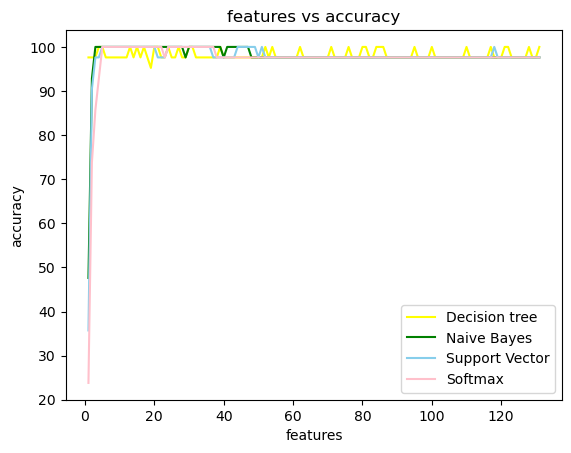

In [11]:
#Plotting
plt.plot(features, accuracy_DT, color='yellow', label='Decision tree')
plt.plot(features, accuracy_NB, color='green', label='Naive Bayes')
plt.plot(features, accuracy_SVC, color='skyblue', label='Support Vector')
plt.plot(features, accuracy_lc, color='pink', label='Softmax')

plt.xlabel("features")
plt.ylabel("accuracy")
plt.title("features vs accuracy")

plt.legend()

plt.show()

In [12]:
#Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
print("Accuracy Score of Random Forest Classifier : "+str(accuracy_score(y_test, rf.predict(x_test))*100)+"%")

Accuracy Score of Random Forest Classifier : 97.61904761904762%


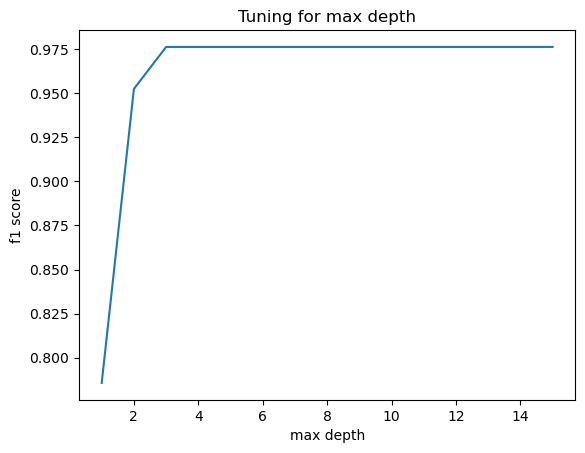

In [13]:
#max_depth
performance_max_depth = []
max_depth = []
for j in range(15):
    rf_md = RandomForestClassifier(random_state=0, max_depth=(j+1))
    rf_md.fit(x_train,y_train)
    performance_max_depth.append(f1_score(y_test, rf_md.predict(x_test), average='micro'))
    max_depth.append((j+1))

plt.plot(max_depth, performance_max_depth)
plt.xlabel("max depth")
plt.ylabel("f1 score")
plt.title("Tuning for max depth")
plt.show()

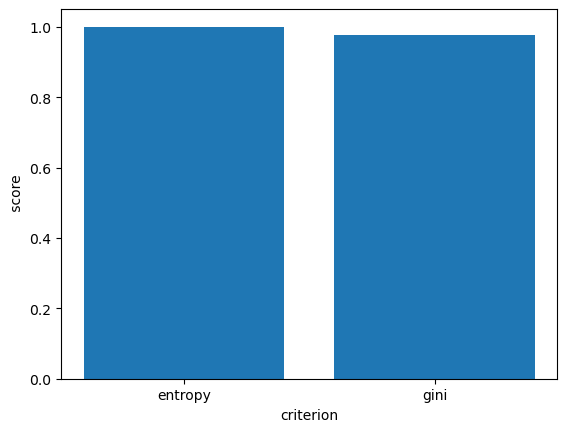

In [14]:
#criterion
performance_criterion = []
criterion = ['entropy', 'gini']

for j in range(2):
    rf_c = RandomForestClassifier(random_state=0, criterion = criterion[j])
    rf_c.fit(x_train,y_train)
    performance_criterion.append(accuracy_score(y_test, rf_c.predict(x_test)))

plt.bar(criterion, performance_criterion)
plt.xlabel("criterion")
plt.ylabel(" score")
plt.ylim()
plt.show()

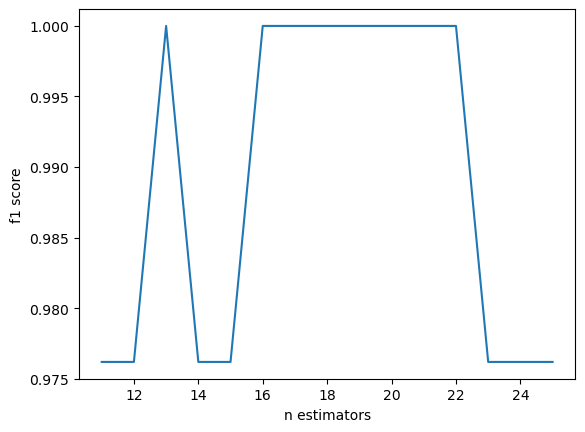

In [15]:
#n_estimators
performance_n_estimators = []
n_estimators = []
for j in range(15):
    rf_ne = RandomForestClassifier(random_state=0, n_estimators=10+(j+1))
    rf_ne.fit(x_train,y_train)
    performance_n_estimators.append(f1_score(y_test, rf_ne.predict(x_test), average='micro'))
    n_estimators.append(10+(j+1))

plt.plot(n_estimators, performance_n_estimators)
plt.xlabel("n estimators")
plt.ylabel("f1 score")
plt.show()


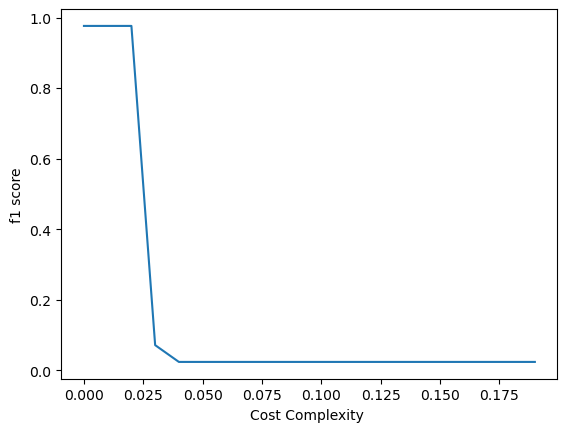

In [18]:
#ccp_alpha
performance_ccp_alpha = []
ccp_alpha = []
for j in range(20):
    rf_ccp = RandomForestClassifier(random_state=0, ccp_alpha=(j)/100)
    rf_ccp.fit(x_train,y_train)
    performance_ccp_alpha.append(f1_score(y_test, rf_ccp.predict(x_test), average='micro'))
    ccp_alpha.append((j)/100)

plt.plot(ccp_alpha, performance_ccp_alpha)
plt.xlabel("Cost Complexity ")
plt.ylabel("f1 score")
plt.show()

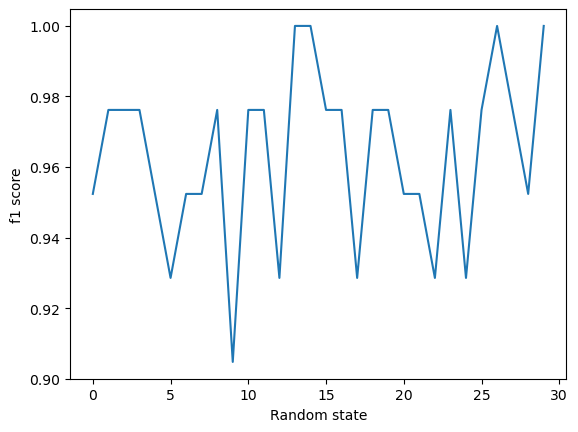

In [28]:
#random_state
performance_random_state = []
random_state = []
for i in range(30):
    #vary random state with optimal values of other parameters to get deterministic high accuracy
    rf_rs = RandomForestClassifier(random_state=i, max_depth=3, criterion='entropy', n_estimators=19, ccp_alpha=0.0)
    rf_rs.fit(x_train,y_train)
    performance_random_state.append(f1_score(y_test, rf_rs.predict(x_test), average='micro'))
    random_state.append(i)

plt.plot(random_state, performance_random_state)
plt.xlabel("Random state")
plt.ylabel("f1 score")
plt.show()

In [27]:
# Random forest classifier
rf_tuned = RandomForestClassifier(random_state=14, max_depth=4, criterion='entropy', n_estimators=19, ccp_alpha=0.0)
rf_tuned.fit(x_train,y_train)
print("Accuracy score: "+str(accuracy_score(y_test, rf_tuned.predict(x_test))*100))

Accuracy score: 100.0
